# Pymaceuticals Inc.
---

### Analysis

#Performance of Pymaceuticals' drug of interest, Capomulin, against the other treatment regimens

- Capomulin and Ramicane have low tumor volumes compared to the other drug treatment regimens and have more effective results.
- The heavier the mouse, the larger the tumor. The correlation between the mouse weight and tumor weight variables was 0.84 and shows a strong relationship (it is close to 1.0). 
- Mouse l509 treated with Capomulin shows substantial decrease in tumor size over the course of the 45 days.
 
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
# default: inner
merge_df = pd.merge(mouse_metadata, study_results,on="Mouse ID",how="inner")

# Display the data table for preview
merge_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.
mice_count = len(merge_df['Mouse ID'].unique())
mice_count

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
#            https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.duplicated.html
dupl_mice_check = merge_df.duplicated(subset=['Mouse ID','Timepoint'])
dupl_mice_check

0       False
1       False
2       False
3       False
4       False
        ...  
1888    False
1889    False
1890    False
1891    False
1892    False
Length: 1893, dtype: bool

In [4]:
#above-continued
dupl_mice_id = merge_df.loc[dupl_mice_check == True, 'Mouse ID'].unique()
dupl_mice_id

array(['g989'], dtype=object)

In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
dupl_mice = merge_df.loc[merge_df['Mouse ID'] == 'g989',:]
dupl_mice

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
#      https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop_duplicates.html
#clean_df = merge_df.drop_duplicates(subset=['Mouse ID','Timepoint'], *, keep='first', inplace=False, ignore_index=False)
#clean_df
clean_df = merge_df.loc[merge_df["Mouse ID"]!= 'g989',:]
clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [7]:
# Checking the number of mice in the clean DataFrame.
mice_count_a = len(clean_df['Mouse ID'].unique())
mice_count_a

248

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
drug_reg = clean_df.groupby('Drug Regimen')
mean = drug_reg['Tumor Volume (mm3)'].mean()
median = drug_reg['Tumor Volume (mm3)'].median()
var = drug_reg['Tumor Volume (mm3)'].var()
std = drug_reg['Tumor Volume (mm3)'].std()
sem = drug_reg['Tumor Volume (mm3)'].sem()
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
drug_reg_df = pd.DataFrame({
    "Mean Tumor Volume": mean,
    "Median Tumor Volume":median,
    "Tumor Volume Variance": var,
    "Tumor Volume Std. Dev.":std,
    "Tumor Volume Std. Err.":sem
})
# Assemble the resulting series into a single summary DataFrame.
drug_reg_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
#    https://sparkbyexamples.com/pandas/pandas-groupby-multiple-columns/#multiple-aggregations
drug_reg_df_agg = clean_df.groupby(['Drug Regimen'])[['Tumor Volume (mm3)']].agg(['mean', 'median', 'var', 'std', 'sem'])
drug_reg_df_agg

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

In [10]:
num_timepoints=clean_df['Drug Regimen'].value_counts()
num_timepoints

Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Placebo      181
Stelasyn     181
Infubinol    178
Ceftamin     178
Propriva     148
Name: Drug Regimen, dtype: int64

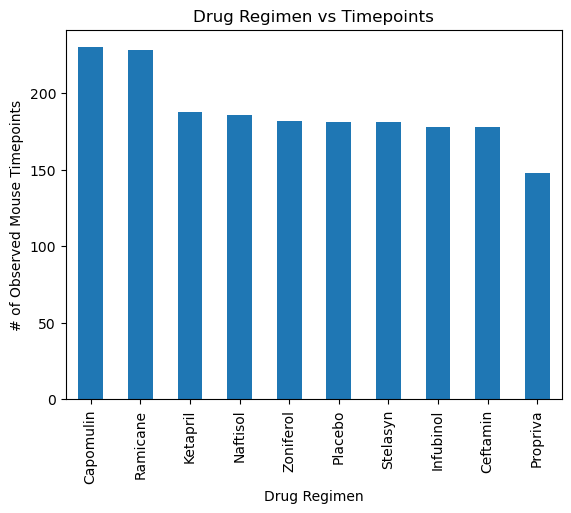

In [11]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
dr_it_tp = clean_df[['Drug Regimen', 'Mouse ID']]
dr_count = dr_it_tp['Drug Regimen'].value_counts()
dr_count
drugfigure = dr_count.plot(kind = "bar", x = 'Drug Regimen', y = 'dr_count', xlabel = 'Drug Regimen', ylabel = '# of Observed Mouse Timepoints' ,title = "Drug Regimen vs Timepoints")

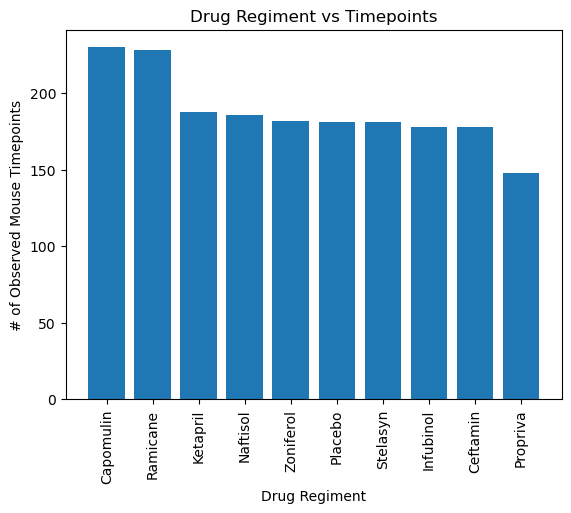

In [12]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
import numpy as np
x_axis = np.arange(len(dr_count))
x_axis
labels = dr_count.index
labels
plt.bar(x_axis, dr_count)
plt.xticks(x_axis, labels, rotation = 'vertical')
plt.xlabel('Drug Regiment')
plt.ylabel('# of Observed Mouse Timepoints')
plt.title('Drug Regiment vs Timepoints')
plt.show()

<Axes: title={'center': 'Mouse Gender Ratio'}, ylabel='Sex'>

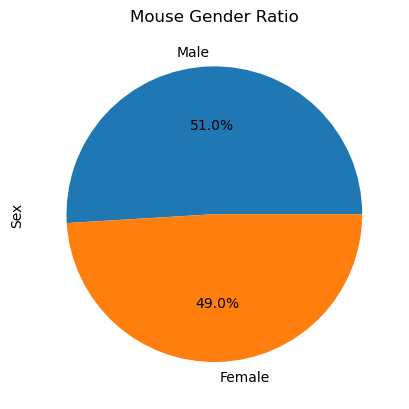

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_data = clean_df['Sex'].value_counts()
gender_data.plot(kind = 'pie', title = 'Mouse Gender Ratio', autopct='%1.1f%%')

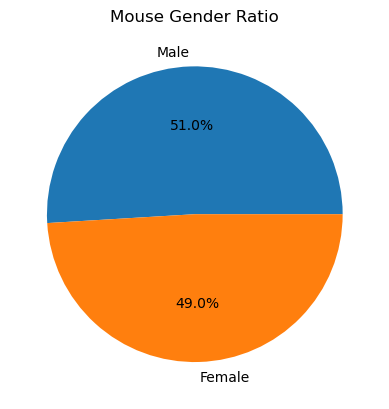

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
pie_label = gender_data.index
plt.pie(gender_data, labels= pie_label, autopct='%1.1f%%')
plt.title("Mouse Gender Ratio")
plt.show()

## Quartiles, Outliers and Boxplots

In [15]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
reduced_df = clean_df.loc[((clean_df['Drug Regimen'] == 'Capomulin')|(clean_df['Drug Regimen'] == 'Ramicane')|
                           (clean_df['Drug Regimen'] == 'Infubinol')|(clean_df['Drug Regimen'] == 'Ceftamin'))]
reduced_df
                
# Start by getting the last (greatest) timepoint for each mouse
reduced_a_df = reduced_df.groupby(['Mouse ID'])
reduced_a_df
last_timepoint = pd.DataFrame(reduced_a_df['Timepoint'].max())
last_timepoint

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_tum_vol_df = pd.merge(last_timepoint, reduced_df, on = ['Mouse ID', 'Timepoint'])
#     https://www.geeksforgeeks.org/how-to-sort-pandas-dataframe/
final_tum_vol_df.sort_values(by=['Tumor Volume (mm3)'],ascending=True, inplace =  True)
final_tum_vol_df

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
40,k403,45,Ramicane,Male,21,16,22.050126,1
70,s185,45,Capomulin,Female,3,17,23.343598,1
51,m601,45,Capomulin,Male,22,17,28.430964,1
90,x401,45,Capomulin,Female,16,15,28.484033,0
27,g791,45,Ramicane,Male,11,16,29.128472,1
...,...,...,...,...,...,...,...,...
43,l471,45,Ceftamin,Female,7,28,67.748662,1
0,a203,45,Infubinol,Female,20,23,67.973419,2
95,y769,45,Ceftamin,Female,6,27,68.594745,4
39,k210,45,Ceftamin,Male,15,28,68.923185,3


In [16]:
treatments = final_tum_vol_df['Drug Regimen'].unique()
treatments

array(['Ramicane', 'Capomulin', 'Infubinol', 'Ceftamin'], dtype=object)

In [17]:
# Put treatments into a list for for loop (and later for plot labels)

treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
# Create empty list to fill with tumor vol data (for plotting)
   # add subset 
tum_vol = []
for treatment in treatments:
    tum_vol = final_tum_vol_df.loc[final_tum_vol_df['Drug Regimen'] == treatment,'Tumor Volume (mm3)']
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tum_vol.append(tum_vol)
    
    # Calculate the IQR and quantitatively determine if there are any potential outliers. 
    
    quartiles = tum_vol.quartile([0.25,0.5,0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    

    
    
    # Determine outliers using upper and lower bounds
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq - (1.5*iqr)
    outlier_volume = subset.loc[(treatment_volumes < lower_bound)|(treatment_volume > upper_bound)]
    print(f"{treatment}'s potential outliers: {outlier_volume['Tumor Volume (mm3)']}")

/var/folders/w4/p_c6055n7t9gvx5w8nndm1500000gn/T/ipykernel_99668/2568943634.py:10: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tum_vol.append(tum_vol)


AttributeError: 'Series' object has no attribute 'quartile'

In [18]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.


## Line and Scatter Plots

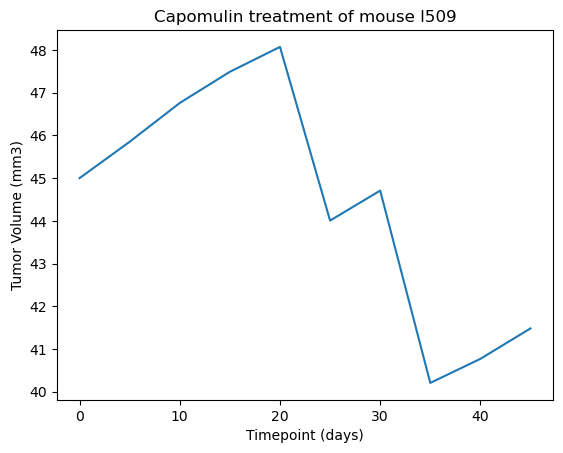

In [19]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
single_mouse = clean_df.loc[
    (clean_df['Drug Regimen'] == "Capomulin") &
    (clean_df['Mouse ID'] == "l509")
]
plt.plot(single_mouse['Timepoint'],single_mouse['Tumor Volume (mm3)'])
plt.title('Capomulin treatment of mouse l509')
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

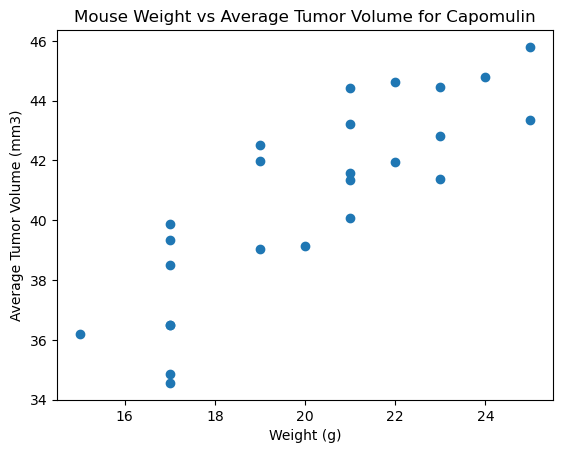

In [21]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
mouse_weight = clean_df.loc[clean_df['Drug Regimen'] == 'Capomulin', 'Weight (g)']
cap_tumor_vol = clean_df.loc[mouse_weight.index].drop(labels=['Drug Regimen','Sex'], axis=1)
avg_tumor_vol = cap_tumor_vol.groupby('Mouse ID').mean()
plt.scatter(avg_tumor_vol['Weight (g)'], avg_tumor_vol['Tumor Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Mouse Weight vs Average Tumor Volume for Capomulin')
plt.show()

## Correlation and Regression

The correlation coefficient between mouse weight and average observed tumor volume is 0.84


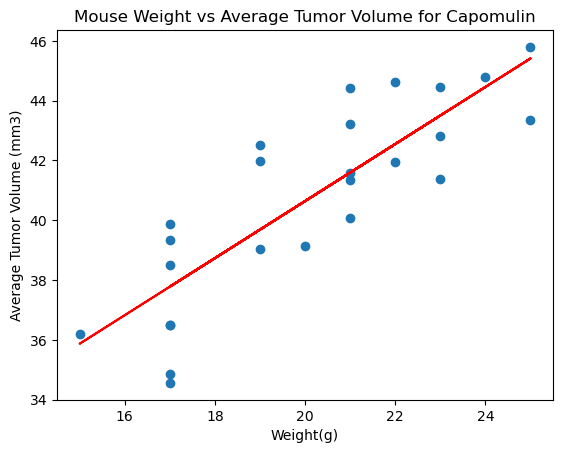

In [24]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(avg_tumor_vol['Weight (g)'], avg_tumor_vol['Tumor Volume (mm3)'])
x_values = avg_tumor_vol['Weight (g)']
y_values = avg_tumor_vol['Tumor Volume (mm3)']
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel('Weight(g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Mouse Weight vs Average Tumor Volume for Capomulin')
print(f"The correlation coefficient between mouse weight and average observed tumor volume is {round(st.pearsonr(x_values,y_values)[0],2)}")
plt.show()